In [41]:
# Importing Neccessary Libraries

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import pickle

In [42]:
df = pd.read_csv('hmisdata.csv')
df.head()


,entry_exit_provider_program_type_code,provider_program_type,client_id,length_of_day,target_reasons,Child_Dependant,Employment,Retired,Disabled,Family
0,PH - Permanent Supportive Housing (disability ...,PSH,377856,1607,0,0,0,0,0,0
1,PH - Permanent Supportive Housing (disability ...,PSH,376205,1653,0,0,0,0,0,0
2,PH - Permanent Supportive Housing (disability ...,PSH,376206,1653,0,0,0,0,0,0
3,PH - Permanent Supportive Housing (disability ...,PSH,294940,1633,0,0,0,0,0,0
4,PH - Permanent Supportive Housing (disability ...,PSH,376273,1642,0,0,0,0,0,0


In [43]:
# Importing Model Ready data.
input_data = df


In [44]:
# Pulling Model Variables.
model_vars = input_data[['length_of_day','provider_program_type','Child_Dependant',
                         'Employment','Retired','Disabled','Family', 'target_reasons']]


In [45]:
# Creating Dummy variables for Categorical variables.
model_vars = pd.get_dummies(model_vars, columns=['provider_program_type','Child_Dependant',
                         'Employment','Retired','Disabled','Family'])



In [46]:
model_vars.columns

Index(['length_of_day', 'target_reasons', 'provider_program_type_COORD_ASSESS',
       'provider_program_type_EMER_SHELTER', 'provider_program_type_HOM_PREV',
       'provider_program_type_HOUSING_NO_DIS', 'provider_program_type_OTHER',
       'provider_program_type_PSH', 'provider_program_type_RAPID_RE_HOUSING',
       'provider_program_type_SERVICES_ONLY',
       'provider_program_type_STREET_OUTREACH',
       'provider_program_type_TRANSI_HOUSING', 'Child_Dependant_0',
       'Child_Dependant_1', 'Employment_0', 'Employment_1', 'Retired_0',
       'Retired_1', 'Disabled_0', 'Disabled_1', 'Family_0', 'Family_1'],
      dtype='object')

In [47]:
X = model_vars[['length_of_day','provider_program_type_COORD_ASSESS',
       'provider_program_type_EMER_SHELTER', 'provider_program_type_HOM_PREV',
       'provider_program_type_HOUSING_NO_DIS', 'provider_program_type_OTHER',
       'provider_program_type_PSH', 'provider_program_type_RAPID_RE_HOUSING',
       'provider_program_type_SERVICES_ONLY',
       'provider_program_type_STREET_OUTREACH',
       'provider_program_type_TRANSI_HOUSING', 'Child_Dependant_0',
       'Child_Dependant_1', 'Employment_0', 'Employment_1', 'Retired_0',
       'Retired_1', 'Disabled_0', 'Disabled_1', 'Family_0', 'Family_1']]

In [48]:
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, model_vars[['target_reasons']])

In [50]:
sds = StandardScaler()
sds.fit(X_train)
X_train = sds.transform(X_train)
X_test = sds.transform(X_test)

In [51]:
# Training MOdel
logreg = LogisticRegression()
model = logreg.fit(X_train,y_train)
# Python model
print(model)
ypred = model.predict(X_test)
scores = roc_auc_score(y_test, ypred)

print(f"Logistic regression got a score of {scores}")
print()
print("And here are the top features: ")
c = X.columns
for cfi in zip(c):
    print(cfi)
print()    
    


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Logistic regression got a score of 0.70439539503163

And here are the top features: 
('length_of_day',)
('provider_program_type_COORD_ASSESS',)
('provider_program_type_EMER_SHELTER',)
('provider_program_type_HOM_PREV',)
('provider_program_type_HOUSING_NO_DIS',)
('provider_program_type_OTHER',)
('provider_program_type_PSH',)
('provider_program_type_RAPID_RE_HOUSING',)
('provider_program_type_SERVICES_ONLY',)
('provider_program_type_STREET_OUTREACH',)
('provider_program_type_TRANSI_HOUSING',)
('Child_Dependant_0',)
('Child_Dependant_1',)
('Employment_0',)
('Employment_1',)
('Retired_0',)
('Retired_1',)
('Disabled_0',)
('Disabled_1',)
('Family_0',)
('Family_1',)



C:\Users\Darrell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [52]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=60,n_jobs=12
                            )
clf.fit(X_train,y_train)
# Python model
print(clf)
ypred = clf.predict(X_test)
scores = roc_auc_score(y_test, ypred)

print(f"RandomForest got a score of {scores}")
print()
print("And here are the top features: ")
c = X.columns
for cfi in zip(c, clf.feature_importances_):
    print(cfi)
print()    

C:\Users\Darrell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=12,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
RandomForest got a score of 0.7794752198932375

And here are the top features: 
('length_of_day', 0.7529628210014224)
('provider_program_type_COORD_ASSESS', 0.00018067079133153772)
('provider_program_type_EMER_SHELTER', 0.01575919250731707)
('provider_program_type_HOM_PREV', 0.020583946309228364)
('provider_program_type_HOUSING_NO_DIS', 0.0020684107481862128)
('provider_program_type_OTHER', 0.011249333875384319)
('provider_program_type_PSH', 0.042220478130155746)
('provider_program_type_RAPID_RE_HOUSING', 0.06682958038341895)
('provider_program_type_SERVICES_ONLY', 0.0305

In [53]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV

tree1 = tree.DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=150,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

tree1

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=1e-07,
            min_samples_leaf=150, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [54]:
# Fitting the model with Training data
tree1.fit(X_train, y_train)
tree1.fit

# score the predicted output from model on our test data against our ground truth test data
#y_predict = tree1.predict(X_test)
#y_predict

ypred = tree1.predict(X_test)
scores = roc_auc_score(y_test, ypred)

print(f"Tree got a score of {scores}")
print()
print("And here are the top features: ")
c = X.columns
for cfi in zip(c, tree1.feature_importances_):
    print(cfi)
print()  



Tree got a score of 0.7359340655463549

And here are the top features: 
('length_of_day', 0.9269151425752528)
('provider_program_type_COORD_ASSESS', 0.0)
('provider_program_type_EMER_SHELTER', 0.0)
('provider_program_type_HOM_PREV', 0.0)
('provider_program_type_HOUSING_NO_DIS', 0.0)
('provider_program_type_OTHER', 0.0)
('provider_program_type_PSH', 0.0)
('provider_program_type_RAPID_RE_HOUSING', 0.0687385326548673)
('provider_program_type_SERVICES_ONLY', 0.004346324769879944)
('provider_program_type_STREET_OUTREACH', 0.0)
('provider_program_type_TRANSI_HOUSING', 0.0)
('Child_Dependant_0', 0.0)
('Child_Dependant_1', 0.0)
('Employment_0', 0.0)
('Employment_1', 0.0)
('Retired_0', 0.0)
('Retired_1', 0.0)
('Disabled_0', 0.0)
('Disabled_1', 0.0)
('Family_0', 0.0)
('Family_1', 0.0)



C:\Users\Darrell\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


In [55]:
import array

In [56]:
block = []
block.append("More Help")
block.append("Success")


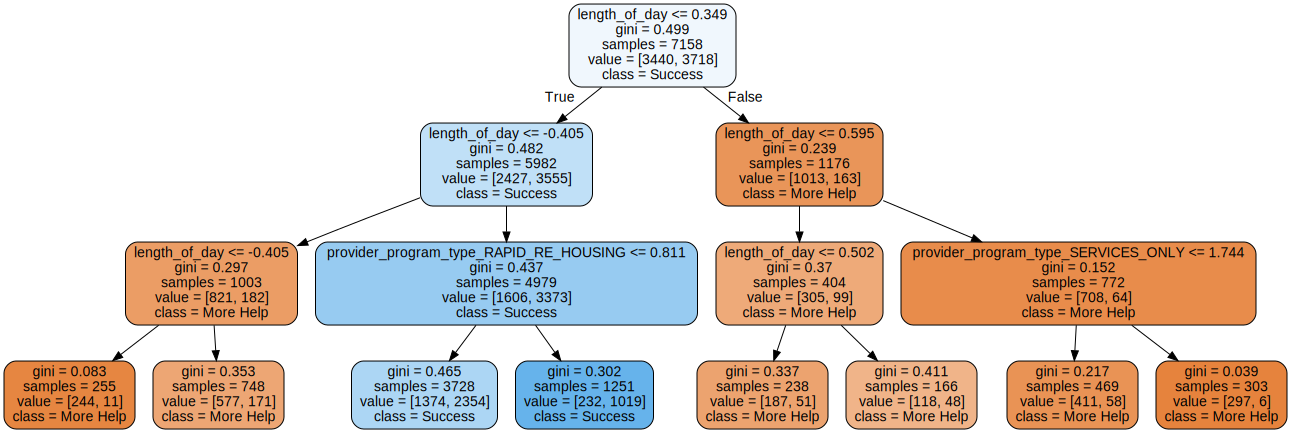

In [57]:
## Constructing a tree 
import graphviz 
dot_data = tree.export_graphviz(tree1, out_file=None,
     feature_names = X.columns,
     class_names = block,
      filled = True, rounded=True) 
import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('tree1.png')


graph = graphviz.Source(dot_data) 
graph
#graph.render("data") 


In [58]:
from sklearn.externals import joblib
filename = 'finalized_model.sav'
joblib.dump(clf, filename)

['finalized_model.sav']